In [1]:
library(ggplot2)
library(reshape2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [3]:
airbnb[1:6,]

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
# Visto que está en orden, simplemente sustituir
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb)=newnames


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
# Empezamos arreglando '', '-' y '28'
airbnb$CodigoPostal[airbnb$CodigoPostal==''] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='-'] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28'] <- NA
# 28002, 28004 y 28051 entradas repetidas
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002'] <- "28002"
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051'] <- "28051"
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004'] <- "28004"
#  2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015
airbnb$CodigoPostal[airbnb$CodigoPostal=='2804'] <- "28004"
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805'] <- "28005"
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815'] <- "28015"
airbnb$CodigoPostal[airbnb$CodigoPostal=='280013'] <- "28013"
airbnb$CodigoPostal[airbnb$CodigoPostal=='28850'] <- "28050"
# Los que no empiecen por 28
airbnb$CodigoPostal[substr(airbnb$CodigoPostal, 1, 2)!='28'] <- NA
# Arreglamos factor - levels
airbnb$CodigoPostal <- factor(airbnb$CodigoPostal)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [7]:
print(table(airbnb$CodigoPostal))


28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1796  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    59    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 
   85    12    12     1     1     1     1     1 


¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [8]:
codigoDF <- data.frame(table(airbnb$CodigoPostal))
colnames(codigoDF) <- c("Codigo", "n")
print("Los 5 códigos postales con mas entradas son los siguientes:")
print(codigoDF[order(-codigoDF$n)[1:5],])
print("Los 5 códigos postales con menos entradas son los siguientes:")
print(codigoDF[order(codigoDF$n)[1:5],])

[1] "Los 5 códigos postales con mas entradas son los siguientes:"
   Codigo    n
12  28012 2060
4   28004 1796
5   28005 1195
13  28013 1020
14  28014  630
[1] "Los 5 códigos postales con menos entradas son los siguientes:"
   Codigo n
48  28048 1
52  28052 1
56  28056 1
57  28058 1
58  28060 1


¿Cuales son los barrios que hay en el código postal 28012?

In [9]:
barrios <- levels(factor(airbnb$Barrio[airbnb$CodigoPostal == 28012]))
print(barrios)

 [1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"    


¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [10]:
print(table(factor(airbnb$Barrio[airbnb$CodigoPostal == 28012])))



        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [11]:
print(paste("Hay ", length(unique(airbnb$Barrio)), " barrios", "y son lo siguiente:"))
print(levels(airbnb$Barrio))

[1] "Hay  125  barrios y son lo siguiente:"
  [1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [12]:
barriosDF = data.frame(table(airbnb$Barrio))
colnames(barriosDF) <- c("Barrio", "n")
print("Los 5 barrios que tienen mayor número entradas son los siguientes")
print(barriosDF[order(-barriosDF$n)[1:5], ])

[1] "Los 5 barrios que tienen mayor número entradas son los siguientes"
         Barrio    n
49  Embajadores 1844
115 Universidad 1358
81      Palacio 1083
112         Sol  940
63     Justicia  785


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [13]:
print(paste("Hay",length(unique(airbnb$TipoAlquiler)), "tipos de alquileres, y son los siguientes"))
print(table(factor(airbnb$TipoAlquiler)))

[1] "Hay 3 tipos de alquileres, y son los siguientes"

Entire home/apt    Private room     Shared room 
           7903            5113             191 


Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


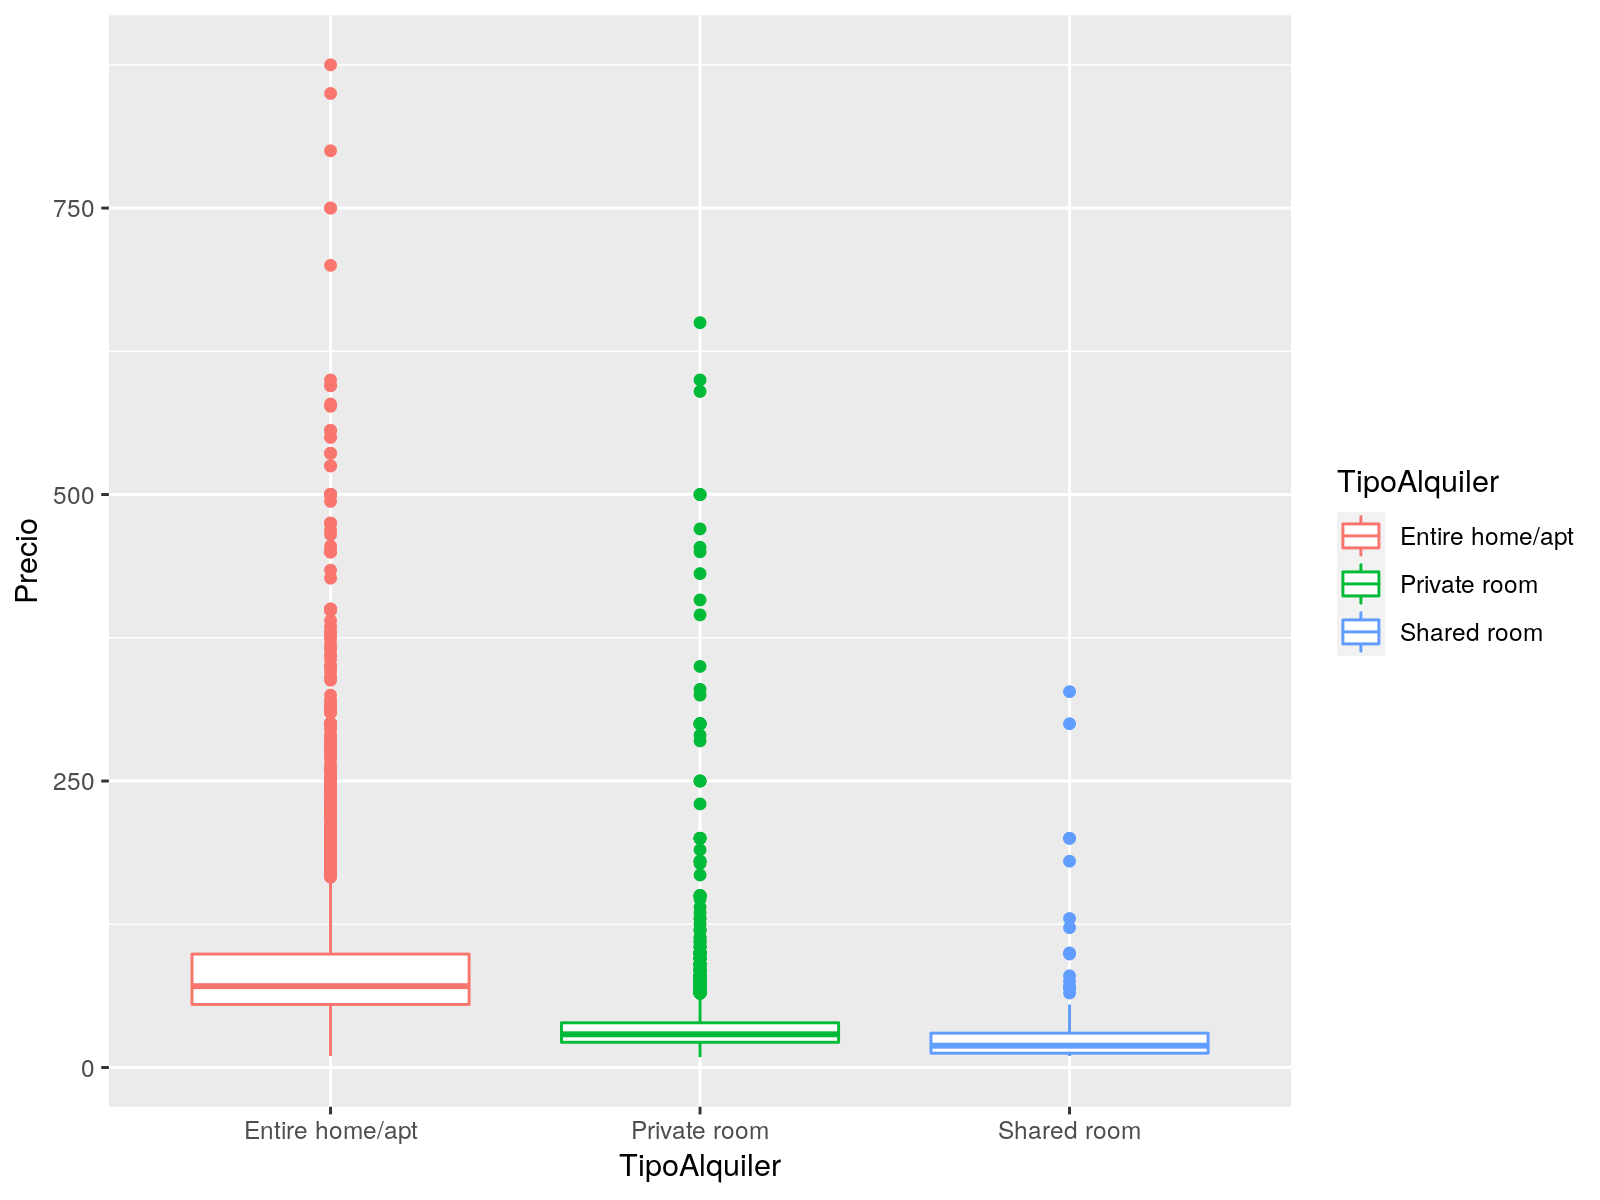

In [14]:
library(ggplot2)
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)
g <- ggplot(airbnb, aes(y=Precio, x=TipoAlquiler))
g <- g + geom_boxplot(aes(color=TipoAlquiler))
g

Warning message:
“Removed 311 rows containing non-finite values (stat_boxplot).”


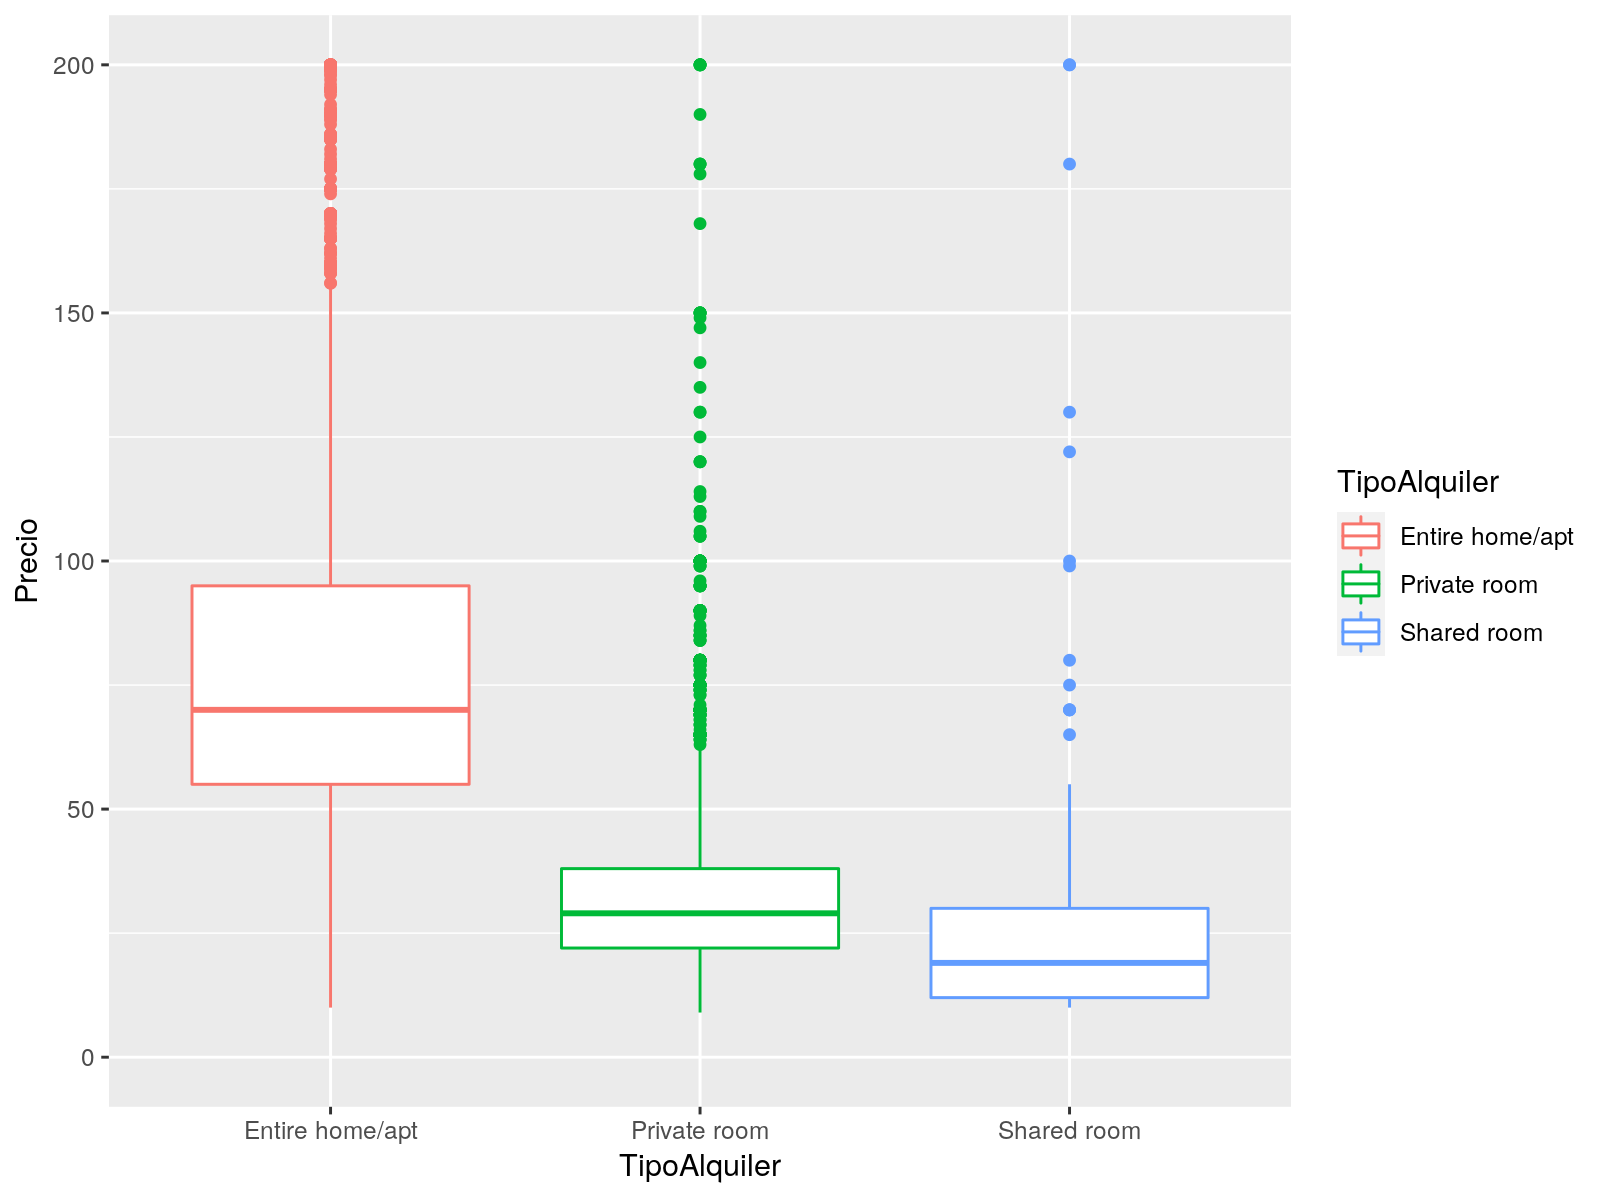

In [15]:
# Para dar un poco mas de detalle en los quantiles intermedio 
g <- g + ylim(0, 200)
g

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [16]:
airbnbfixed <- airbnb[na.omit(airbnb$Precio),]
# Media
media <- list()
tipoAlquiler <- levels(c(airbnbfixed$TipoAlquiler))
for (alquiler in tipoAlquiler) {
    media[[alquiler]] <- mean(airbnbfixed$Precio[airbnbfixed$TipoAlquiler == alquiler])
}
print(data.frame(media))
print("Parece que hay diferencia, vamos a ver si sigue una distribución Gaussiana")

  Entire.home.apt Private.room Shared.room
1        92.76952     29.57811     20.1875
[1] "Parece que hay diferencia, vamos a ver si sigue una distribución Gaussiana"


In [17]:
# Shapiro
test <-list()
for (tipo in levels(airbnb$TipoAlquiler)){
    test[[tipo]] <- shapiro.test(na.omit(airbnb$Precio[airbnb$TipoAlquiler==tipo][1:5000]))$p.value
}
print(data.frame(test))
print("El p-valor es menor de 0.05 en los 3 tipos de alquileres (no siguen una distribución Gaussiana), por lo que no podemos usar el test de ANOVA, usaremos el de Kruskal-Wallis")

  Entire.home.apt Private.room  Shared.room
1    1.240779e-72 9.189748e-85 4.516721e-24
[1] "El p-valor es menor de 0.05 en los 3 tipos de alquileres (no siguen una distribución Gaussiana), por lo que no podemos usar el test de ANOVA, usaremos el de Kruskal-Wallis"


In [18]:
kruskal.test(Precio ~ TipoAlquiler, data=airbnb)
print("Dado el p-value cercano a 0, Podemos concluir que la diferencia que hay es estadísticamente significativa")


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "Dado el p-value cercano a 0, Podemos concluir que la diferencia que hay es estadísticamente significativa"


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [19]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=="Entire home/apt", ]

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [20]:
barriosDF = data.frame(table(airbnb_entire$Barrio))
colnames(barriosDF) <- c("Barrio", "n")
print("Los 5 barrios con mayor números de apartamentos enteros")
print(barriosDF[order(-barriosDF$n)[1:5], ])

[1] "Los 5 barrios con mayor números de apartamentos enteros"
         Barrio    n
49  Embajadores 1228
115 Universidad  984
81      Palacio  769
112         Sol  701
41       Cortes  574


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [21]:
barrioPrecioDF <- aggregate(.~Barrio, airbnb_entire, mean, na.rm=TRUE)[,c("Barrio", "Precio")]
barriosMayorPrecioDF <- barrioPrecioDF[order(-barrioPrecioDF$Precio)[1:5], ]
print("Los 5 barrios con mayor precio en apartamentos enteros")
print(barriosMayorPrecioDF)

[1] "Los 5 barrios con mayor precio en apartamentos enteros"
          Barrio Precio
29     Jerónimos    230
14    Castellana    190
3        Almagro    185
28    Guindalera    180
42 Pinar del Rey    155


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [22]:
# Considerando que se pide en los barrios de mayor precio visto en el apartado anterior
barrioFreqDF <- data.frame(table(airbnb_entire$Barrio))
colnames(barrioFreqDF) <- c("Barrio", "n")
barrioApartamentoPrecioDF <- merge(by='Barrio', barriosMayorPrecioDF, barrioFreqDF, all=FALSE)
print(barrioApartamentoPrecioDF[order(-barrioApartamentoPrecioDF$Precio),])

         Barrio Precio  n
4     Jerónimos    230 62
2    Castellana    190 73
1       Almagro    185 97
3    Guindalera    180 82
5 Pinar del Rey    155  9


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [23]:
barrioApartamentoPrecioDF <- merge(by='Barrio', barrioPrecioDF, barrioFreqDF, all=FALSE)
barrioApartamentoPrecioDF <- barrioApartamentoPrecioDF[barrioApartamentoPrecioDF$n > 100, ]
print("Los 5 barrios con mayor precio y con mas de 100 entradas de alquiler")
print(barrioApartamentoPrecioDF[order(-barrioApartamentoPrecioDF$Precio)[1:5], ])

[1] "Los 5 barrios con mayor precio y con mas de 100 entradas de alquiler"
      Barrio    Precio   n
30  Justicia 110.80000 534
52 Trafalgar 104.60000 223
51       Sol  97.54237 701
19    Cortes  91.46429 574
27      Goya  89.66667 142


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

In [24]:
options(repr.plot.height=3,repr.plot.width=8 , repr.plot.res = 200)

Warning message:
“Removed 31 rows containing non-finite values (stat_density).”


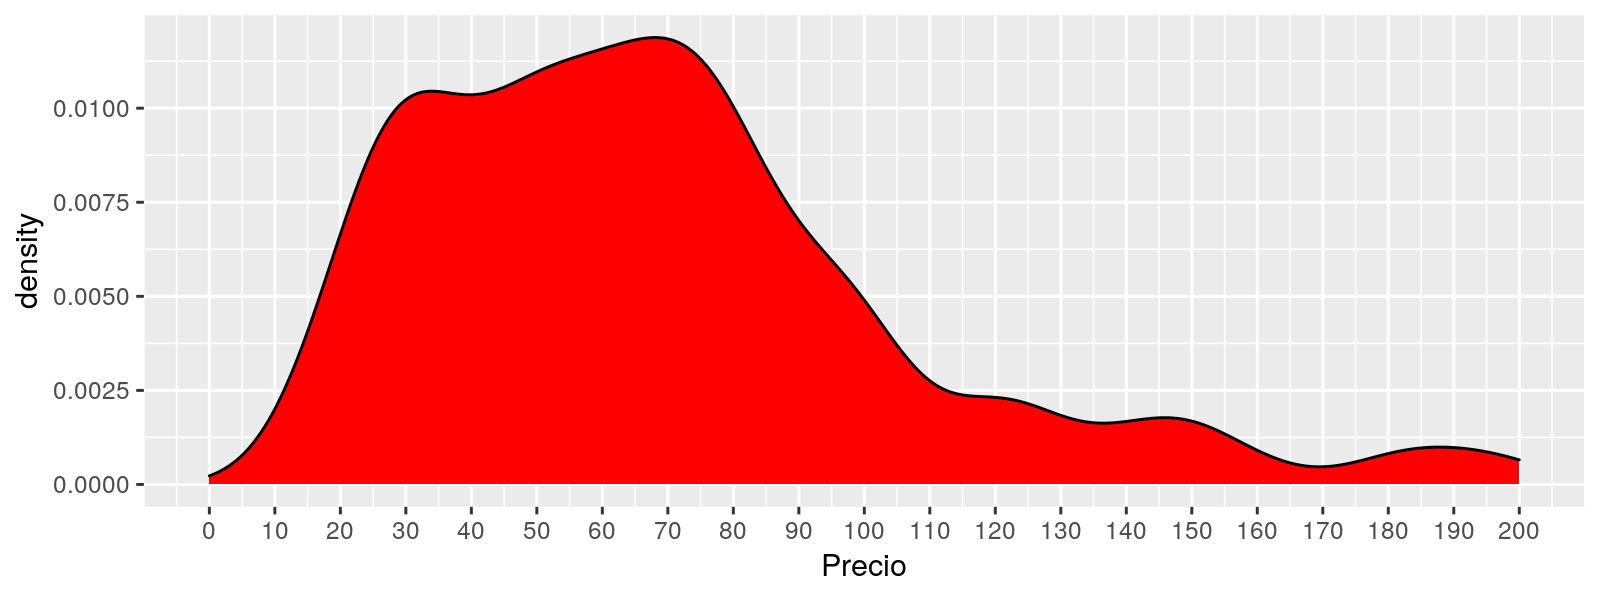

In [25]:
# Justicia
g <- ggplot(data=airbnb[airbnb$Barrio == "Justicia", ], aes(x = Precio))
g <- g + geom_density(fill="red",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,200,10), lim=c(0,200))
g

Warning message:
“Removed 19 rows containing non-finite values (stat_density).”


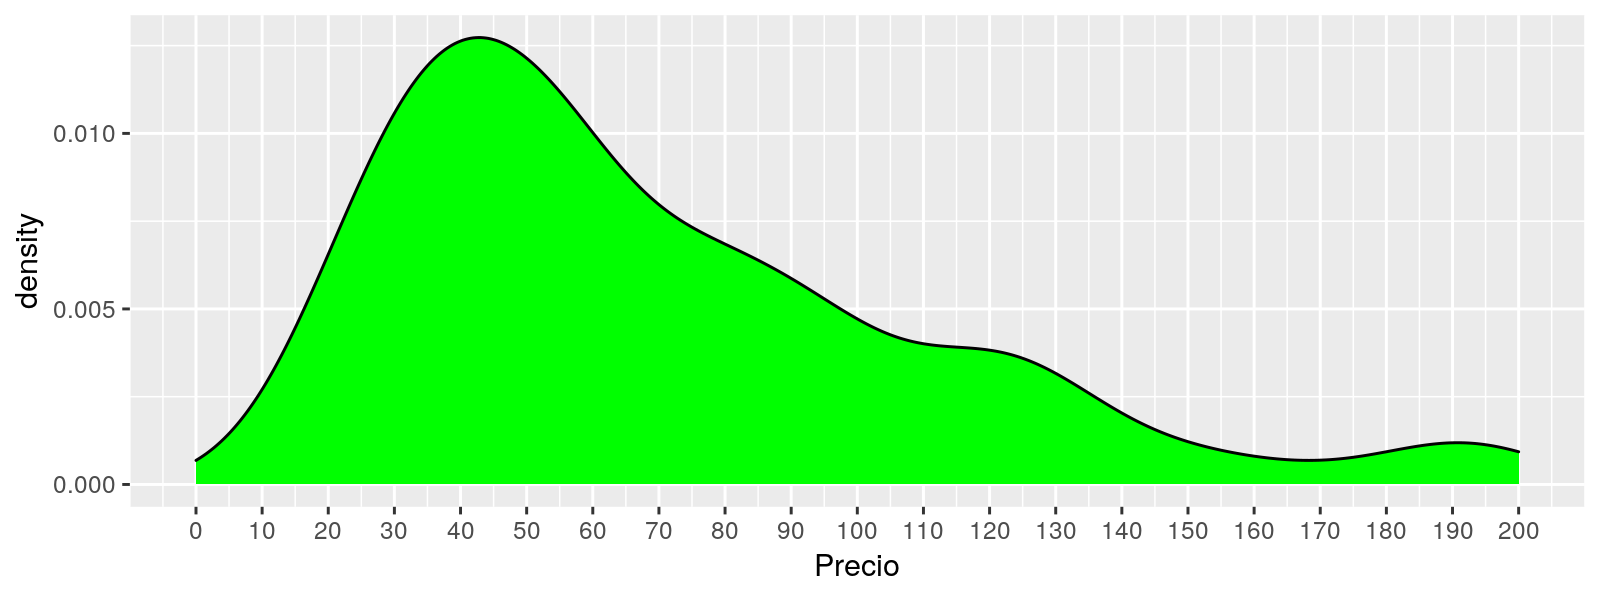

In [26]:
# Trafalgar
g <- ggplot(data=airbnb[airbnb$Barrio == "Trafalgar", ], aes(x = Precio))
g <- g + geom_density(fill="green",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,200,10), lim=c(0,200))
g

Warning message:
“Removed 26 rows containing non-finite values (stat_density).”


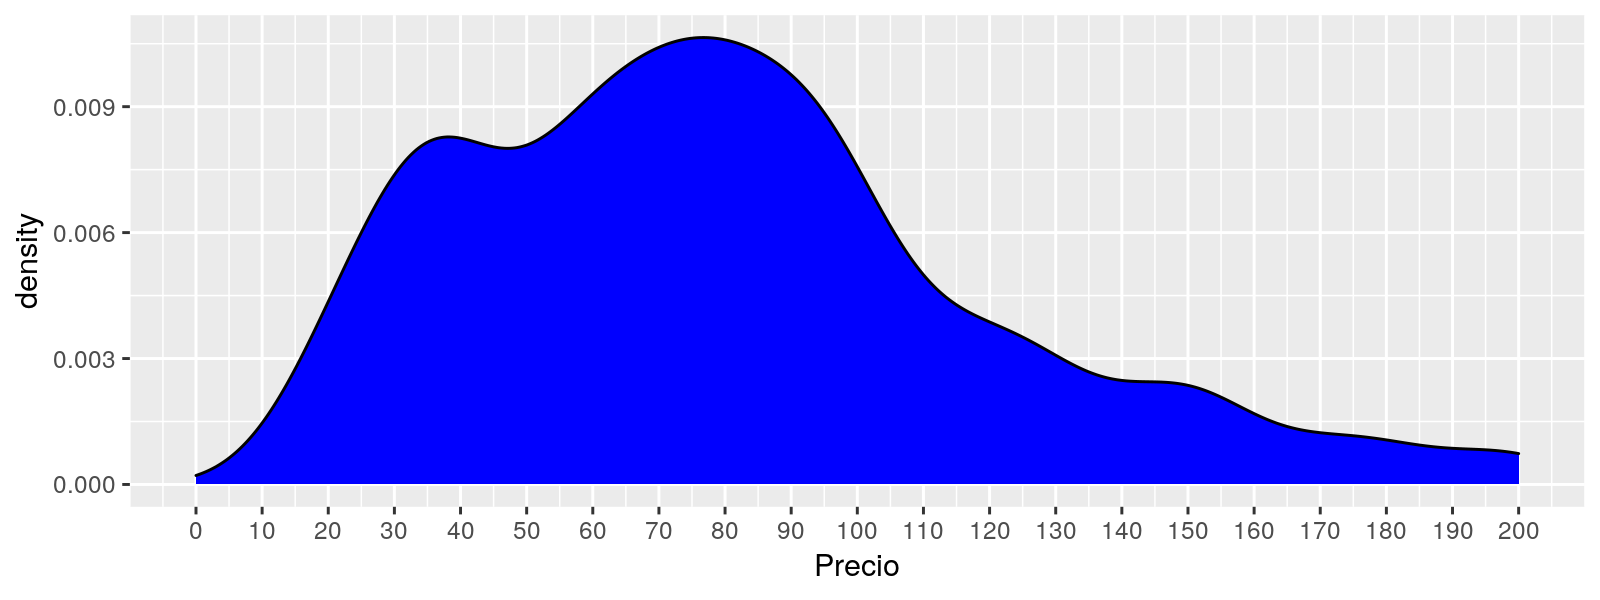

In [27]:
# Sol
g <- ggplot(data=airbnb[airbnb$Barrio == "Sol", ], aes(x = Precio))
g <- g + geom_density(fill="blue",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,200,10), lim=c(0,200))
g

Warning message:
“Removed 21 rows containing non-finite values (stat_density).”


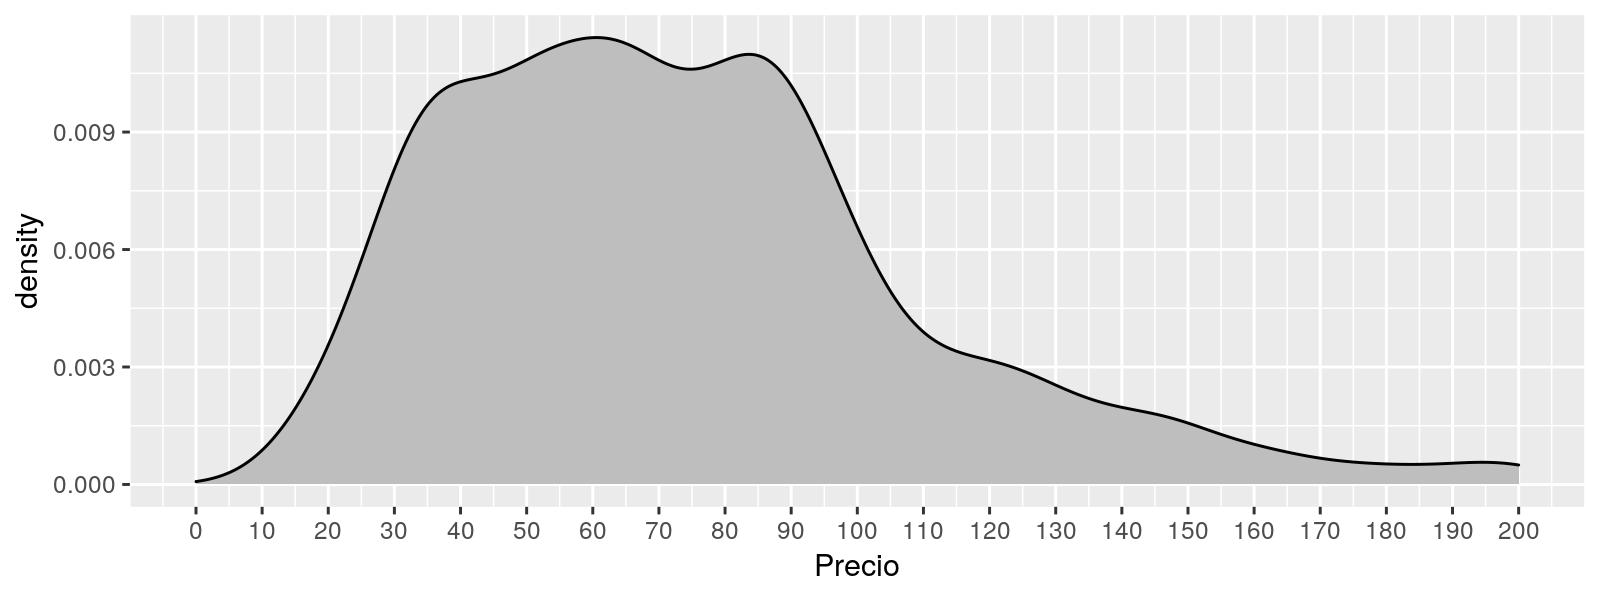

In [28]:
# Cortes
g <- ggplot(data=airbnb[airbnb$Barrio == "Cortes", ], aes(x = Precio))
g <- g + geom_density(fill="grey",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,200,10), lim=c(0,200))
g

Warning message:
“Removed 7 rows containing non-finite values (stat_density).”


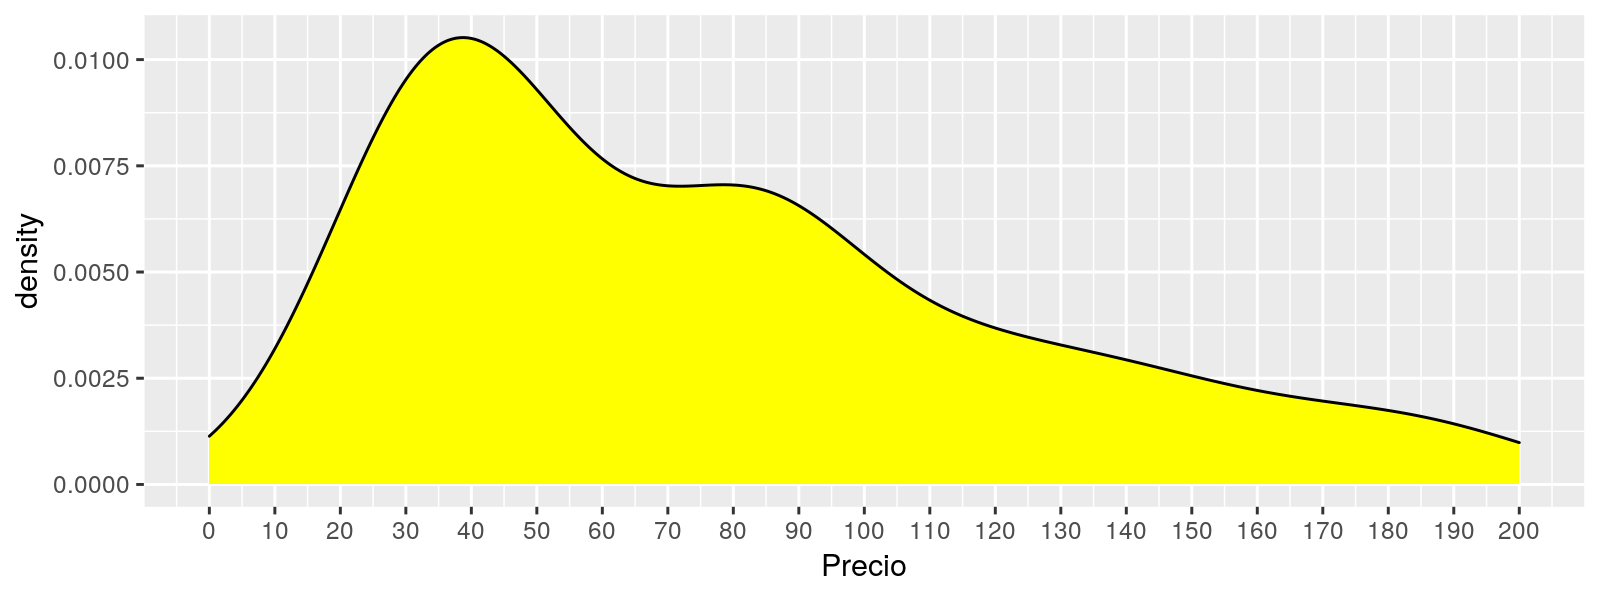

In [29]:
# Goya
g <- ggplot(data=airbnb[airbnb$Barrio == "Goya", ], aes(x = Precio))
g <- g + geom_density(fill="yellow",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,200,10), lim=c(0,200))
g

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [30]:
barrioTamañoDF <- aggregate(.~Barrio, airbnb_entire, mean, na.rm=TRUE)[,c("Barrio", "MetrosCuadrados")]
barrioApartamentoPrecioDF <- barrioApartamentoPrecioDF[order(-barrioApartamentoPrecioDF$Precio)[1:5], ]
print(merge(barrioTamañoDF, barrioApartamentoPrecioDF, "Barrio"))

     Barrio MetrosCuadrados    Precio   n
1    Cortes        13.99186  91.46429 574
2      Goya        51.68504  89.66667 142
3  Justicia        27.66651 110.80000 534
4       Sol        44.35567  97.54237 701
5 Trafalgar        41.02596 104.60000 223


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

In [31]:
# Primero vamos a limpiar datos (0 y NA)
airbnbFiltered <- na.omit(airbnb[, c('Barrio', 'MetrosCuadrados')])
airbnbFiltered <- airbnbFiltered[airbnbFiltered$MetrosCuadrados > 0, ]
summary(airbnbFiltered)

         Barrio    MetrosCuadrados   
 Sol        : 42   Min.   :  0.7432  
 Universidad: 42   1st Qu.: 15.2129  
 Embajadores: 40   Median : 49.9818  
 Palacio    : 28   Mean   : 58.0454  
 Cortes     : 17   3rd Qu.: 74.9727  
 Justicia   : 12   Max.   :480.0298  
 (Other)    :133                     

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


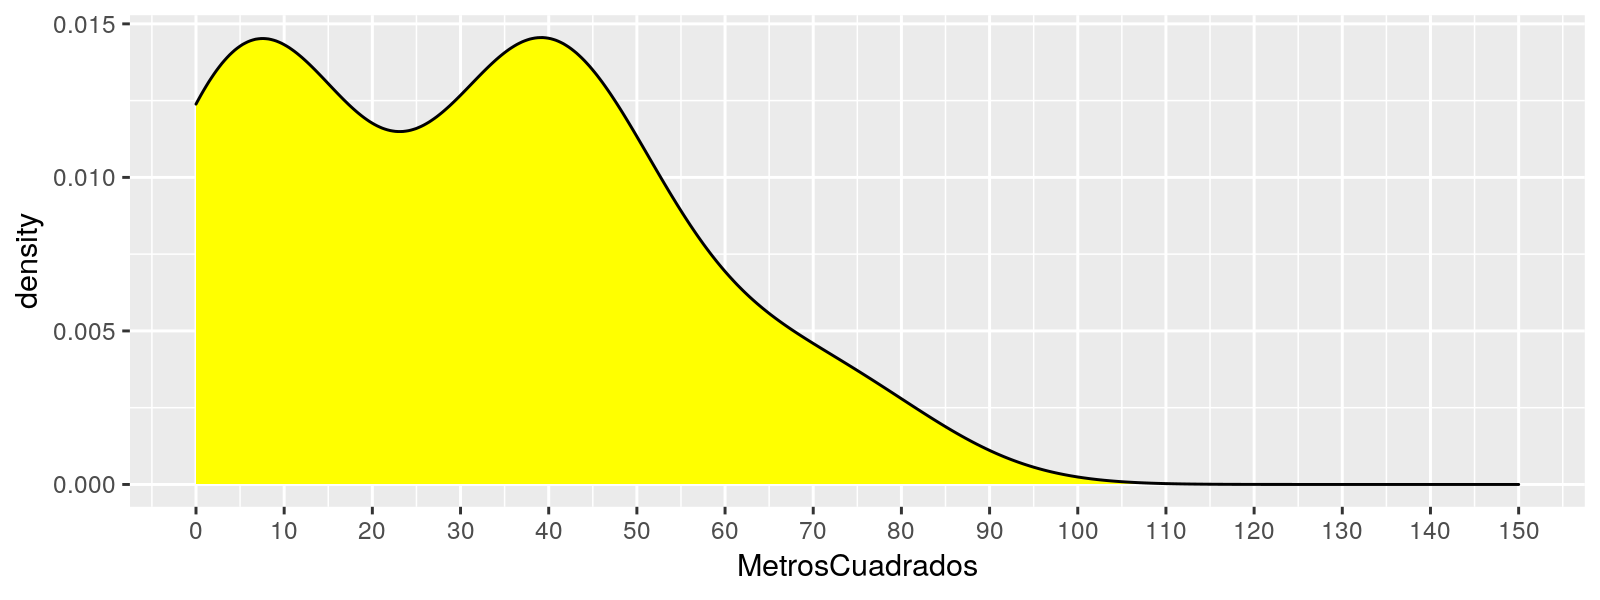

In [32]:
# Cortes
g <- ggplot(data=airbnbFiltered[airbnbFiltered$Barrio == "Cortes", ], aes(x = MetrosCuadrados))
g <- g + geom_density(fill="yellow",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,150,10), lim=c(0,150))
g

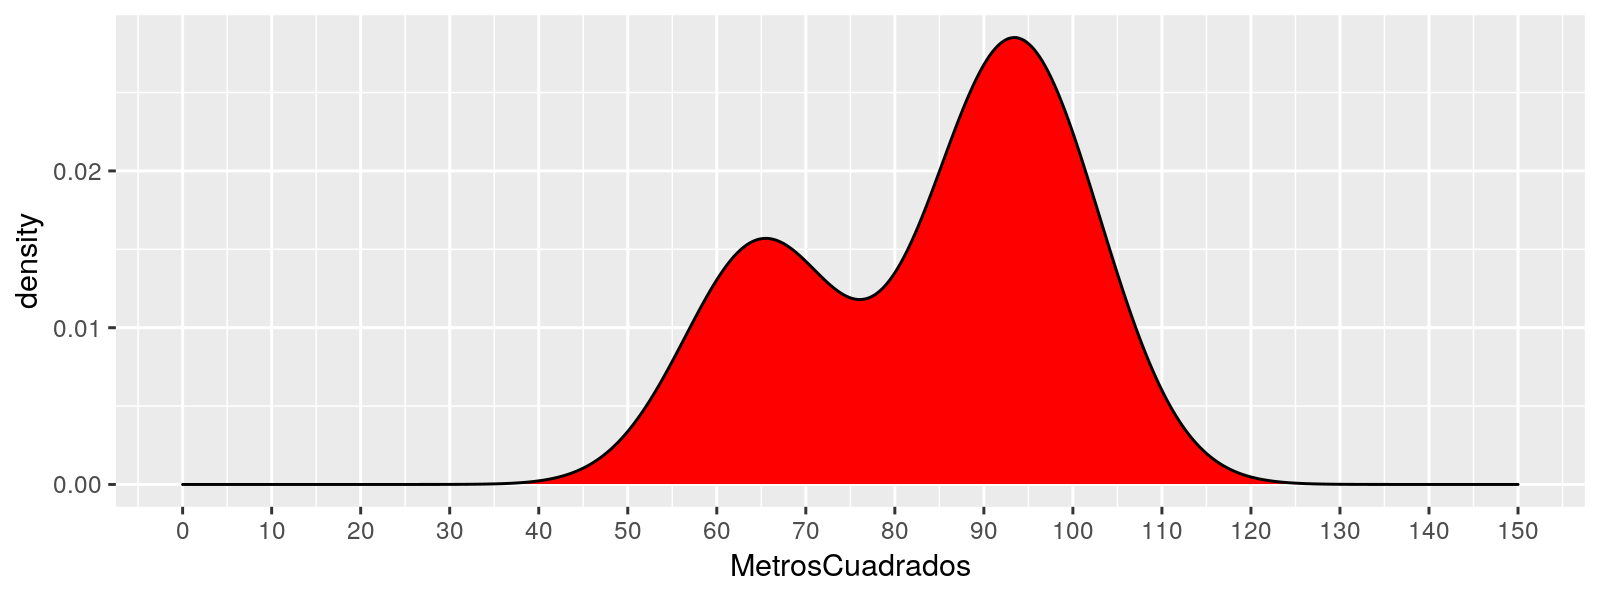

In [33]:
# Goya
g <- ggplot(data=airbnbFiltered[airbnbFiltered$Barrio == "Goya", ], aes(x = MetrosCuadrados))
g <- g + geom_density(fill="red",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,150,10), lim=c(0,150))
g

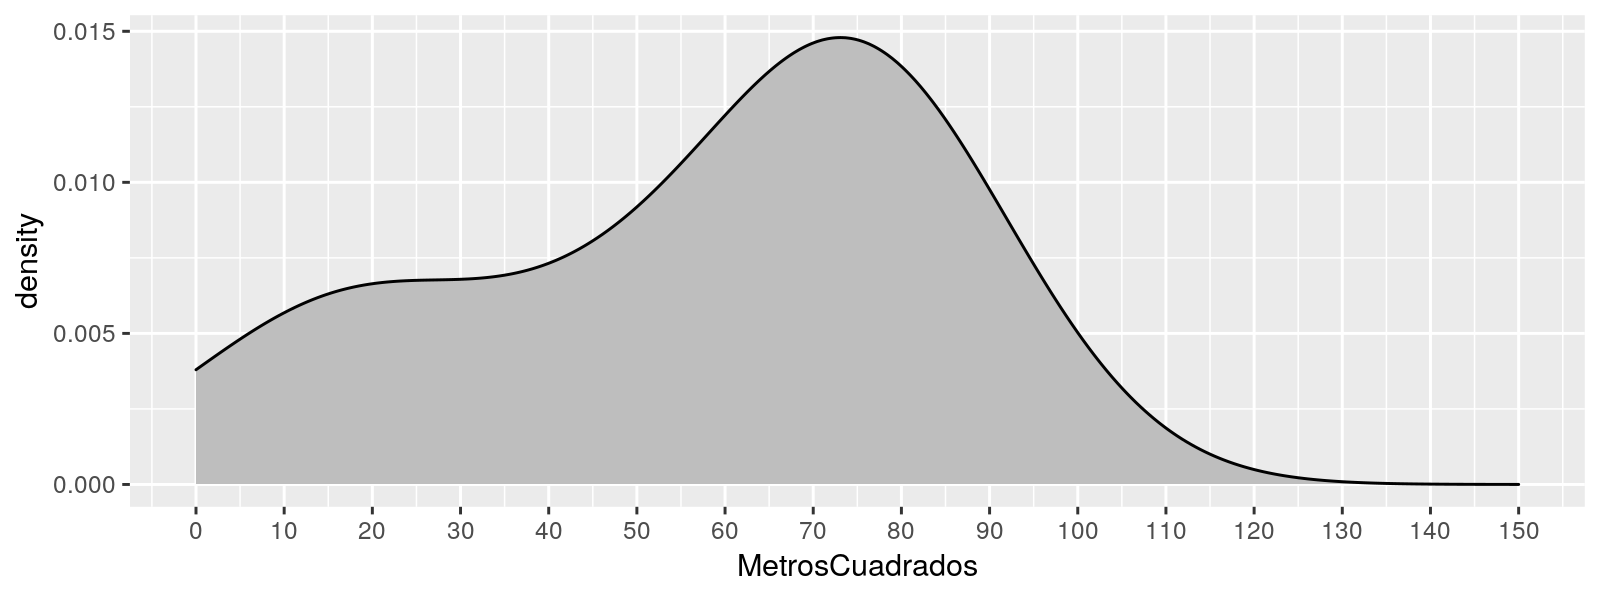

In [34]:
# Justicia
g <- ggplot(data=airbnbFiltered[airbnbFiltered$Barrio == "Justicia", ], aes(x = MetrosCuadrados))
g <- g + geom_density(fill="grey",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,150,10), lim=c(0,150))
g

Warning message:
“Removed 4 rows containing non-finite values (stat_density).”


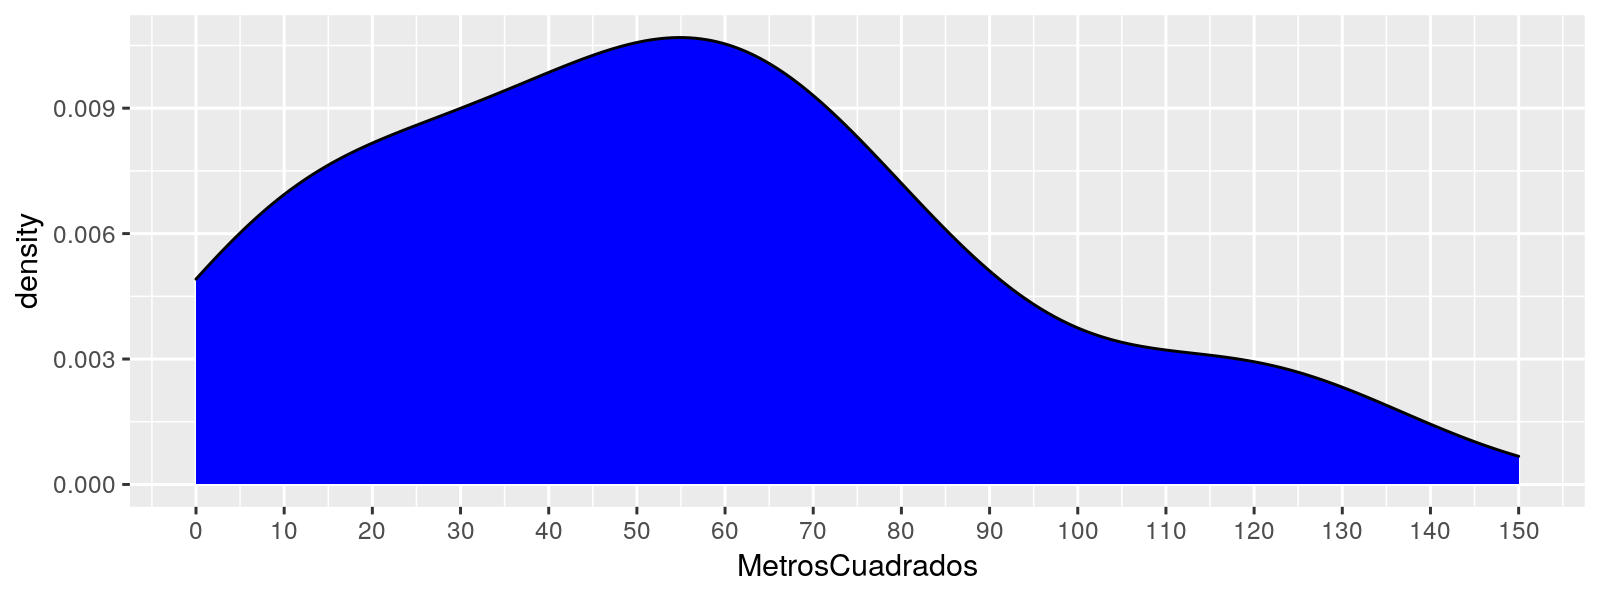

In [35]:
# Sol
g <- ggplot(data=airbnbFiltered[airbnbFiltered$Barrio == "Sol", ], aes(x = MetrosCuadrados))
g <- g + geom_density(fill="blue",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,150,10), lim=c(0,150))
g

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


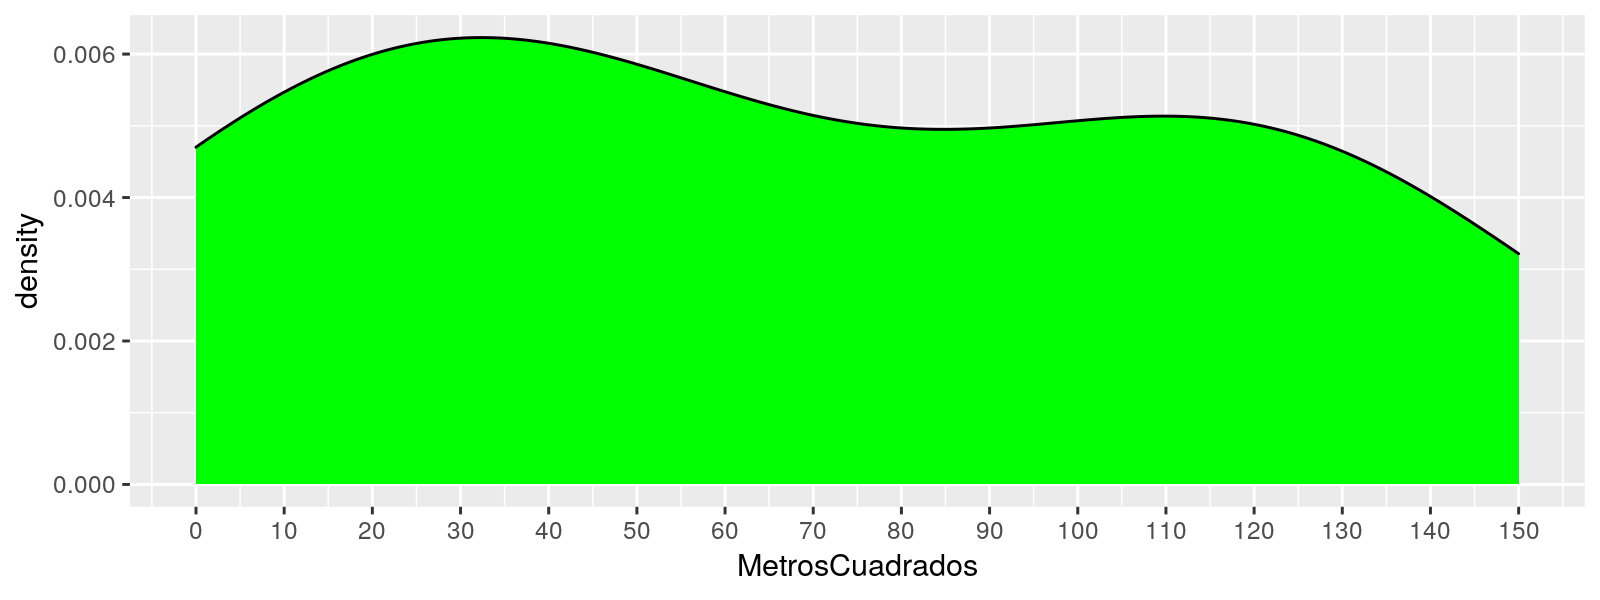

In [36]:
# Trafalgar
g <- ggplot(data=airbnbFiltered[airbnbFiltered$Barrio == "Trafalgar", ], aes(x = MetrosCuadrados))
g <- g + geom_density(fill="green",color="#010101")
g <- g + scale_x_continuous(breaks = seq(0,150,10), lim=c(0,150))
g

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [37]:
barrios <- c("Cortes", "Goya", "Justicia", "Sol", "Trafalgar")
media <- list()
for (barrio in barrios) {
    media[[barrio]] <- mean(airbnbFiltered[airbnbFiltered$Barrio == barrio, "MetrosCuadrados"])
}
print(data.frame(media))

    Cortes     Goya Justicia     Sol Trafalgar
1 36.12287 84.01528 56.24502 66.0474  80.85658


In [38]:
# Las medias parecen diferentes, pero vamos a comprobarlo, primero comprobamos si siguen una distribución gaussiana
test <- list()
for (barrio in barrios) {
    test[[barrio]] <- shapiro.test(airbnbFiltered$MetrosCuadrados[airbnbFiltered$Barrio==barrio])$p.value
}
print(data.frame(test))
print("Los pvalue > 0.05 nos dicen que, Goya, Justicia y Trafalgar si que pueden seguir una distribución normal")

       Cortes      Goya  Justicia        Sol Trafalgar
1 0.001554145 0.3988273 0.1364441 0.00180895 0.5253464
[1] "Los pvalue > 0.05 nos dicen que, Goya, Justicia y Trafalgar si que pueden seguir una distribución normal"


In [39]:
# Siguiendo con el análisis, vamos a comparar las 3 variables que siguen una distribución normal
TukeyHSD(aov( MetrosCuadrados ~ Barrio, data=
             airbnbFiltered[airbnbFiltered$Barrio==c("Goya", "Justicia", "Trafalgar"),]))

Warning message in `==.default`(airbnbFiltered$Barrio, c("Goya", "Justicia", "Trafalgar")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(airbnbFiltered$Barrio, c("Goya", "Justicia", "Trafalgar")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = MetrosCuadrados ~ Barrio, data = airbnbFiltered[airbnbFiltered$Barrio == c("Goya", "Justicia", "Trafalgar"), ])

$Barrio
                        diff       lwr      upr     p adj
Justicia-Goya      -33.53798 -312.7462 245.6702 0.9061782
Trafalgar-Goya     -11.24126 -266.1223 243.6398 0.9865170
Trafalgar-Justicia  22.29672 -175.1333 219.7267 0.9163662


Warning message in `==.default`(airbnbFiltered$Barrio, c("Goya", "Justicia", "Trafalgar")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


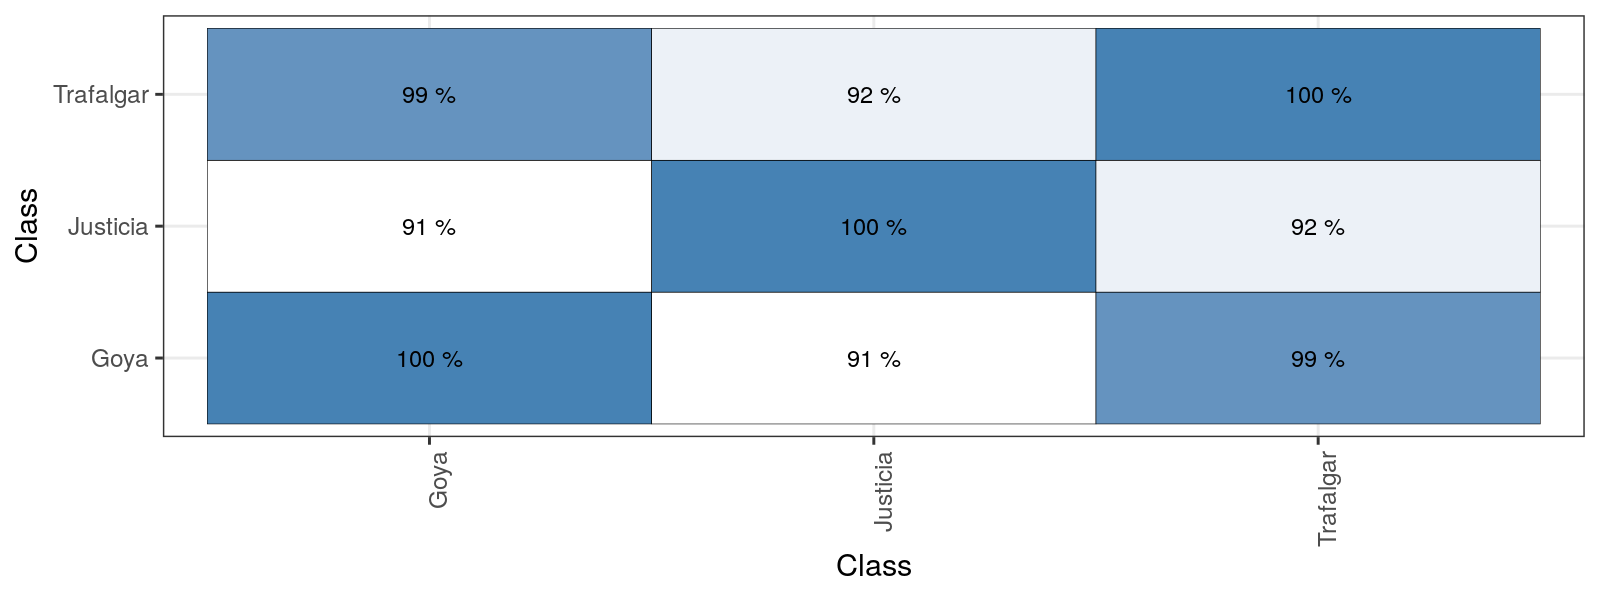

In [40]:
df <- airbnbFiltered[airbnbFiltered$Barrio==c("Goya", "Justicia", "Trafalgar"),]
tky<-TukeyHSD(aov( MetrosCuadrados  ~ Barrio, data=df))
tky.result<-data.frame(tky$Barrio)
cn <-sort(unique(df$Barrio))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  geom_text(aes(label=paste(round(value*100,0),"%")),size = 3) +
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

In [41]:
print("Podemos comprobar que la probabilidad de que tenagn la misma media es alta, sobre todo Goya y Trafalgar")
df <- airbnbFiltered[airbnbFiltered$Barrio==c("Cortes","Sol"),]
kruskal.test(MetrosCuadrados ~ Barrio, data=df)
print("Comparando entre si Cortes y sol, tienen un p-value de 0.33")
df <- airbnbFiltered[airbnbFiltered$Barrio==barrios,]
kruskal.test(MetrosCuadrados ~ Barrio, data=df)
print("Y si realizaramos el test con todos los barrios no da un pvalue de 0.85 lo cual se puede concluir que las difrentes medias no son estadísticamentes significativas")

[1] "Podemos comprobar que la probabilidad de que tenagn la misma media es alta, sobre todo Goya y Trafalgar"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 0.93836, df = 1, p-value = 0.3327


[1] "Comparando entre si Cortes y sol, tienen un p-value de 0.33"


Warning message in `==.default`(airbnbFiltered$Barrio, barrios):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 0.77105, df = 3, p-value = 0.8564


[1] "Y si realizaramos el test con todos los barrios no da un pvalue de 0.85 lo cual se puede concluir que las difrentes medias no son estadísticamentes significativas"


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

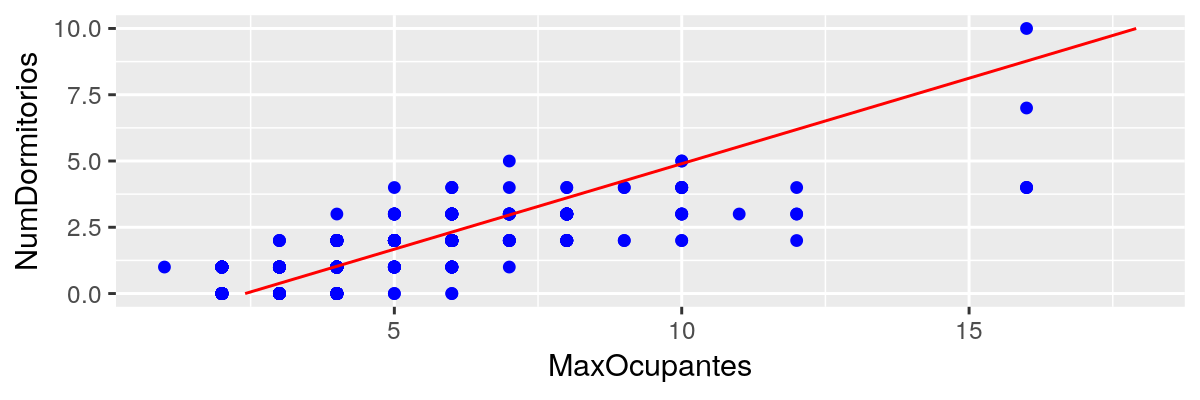

In [42]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=="Entire home/apt", ] # Vuelvo a cargarlo por si acaso lo modifiqué
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

# Y = NumDormitorios | X = MaxOcupantes
model <- lm(data=barrio_sol, formula = barrio_sol$MaxOcupantes ~ barrio_sol$NumDormitorios)
barrio_sol$LinealModel <- model$coefficients[1] + model$coefficients[2]*barrio_sol$NumDormitorios
# ó bien podiamos usar barrio_sol$LinealModel <- predict(model, barrio_sol) 
# Veamoslo en la gráfica
library(ggplot2)
options(repr.plot.height=2,repr.plot.width=6)
g <- ggplot(data=barrio_sol, aes(MaxOcupantes, NumDormitorios))
g <- g + geom_point(color='blue')
g <- g + geom_line(data=barrio_sol, aes(LinealModel), color='red')
g

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [43]:
cols <- c('NumBanyos', 'NumDormitorios', 'MaxOcupantes', 'MetrosCuadrados', 'Precio')
barrio_sol <- na.omit(barrio_sol[, cols])
#barrio_sol <- barrio_sol[barrio_sol$MetrosCuadrados > 0, ]
matrixCor <- cor(cbind(barrio_sol$NumBanyos, barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados))
colnames(matrixCor) <- cols[1:4]
rownames(matrixCor) <- cols[1:4]
matrixCor

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6873719,0.7017290,0.4820549
NumDormitorios,0.6873719,1.0000000,0.7853809,0.5684521
MaxOcupantes,0.7017290,0.7853809,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


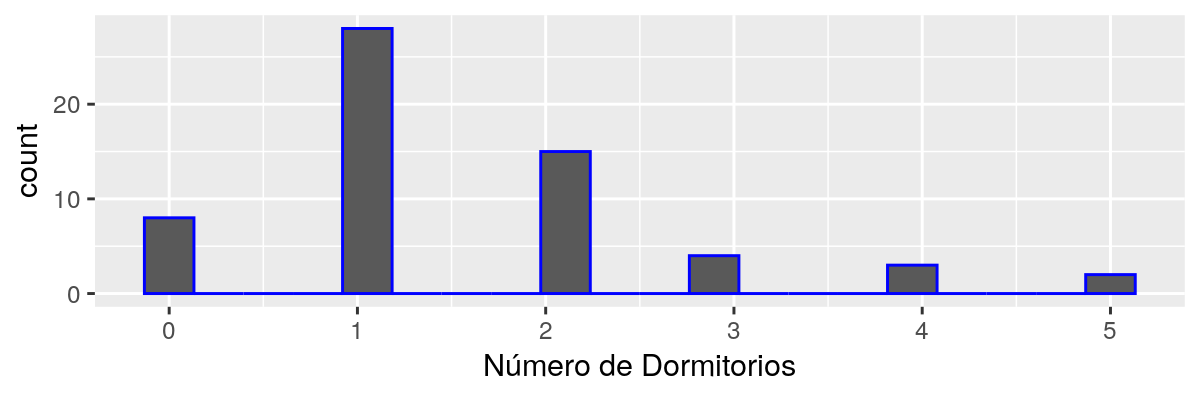

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7427272,0.8518237,0.5581533
NumDormitorios,0.7427272,1.0000000,0.7913624,0.7844599
MaxOcupantes,0.8518237,0.7913624,1.0000000,0.7042954
MetrosCuadrados,0.5581533,0.7844599,0.7042954,1.0000000


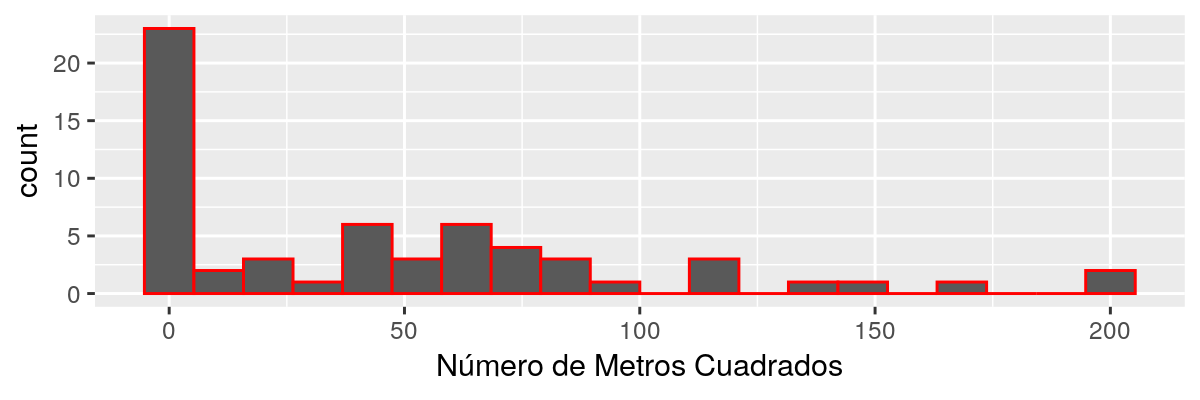

In [44]:
ggplot(data=barrio_sol, aes(x=NumDormitorios))+
   geom_histogram(bins=20, color='blue', position='dodge')+
   xlab('Número de Dormitorios')
ggplot(data=barrio_sol, aes(x=MetrosCuadrados))+
   geom_histogram(bins=20, color='red', position='dodge')+
   xlab('Número de Metros Cuadrados')
barrio_sol <- barrio_sol[barrio_sol$NumDormitorios > 0, ]
barrio_sol <- barrio_sol[barrio_sol$MetrosCuadrados > 0, ]
matrixCor <- cor(cbind(barrio_sol$NumBanyos, barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados))
colnames(matrixCor) <- cols[1:4]
rownames(matrixCor) <- cols[1:4]
matrixCor

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [45]:
matrixCor <- cor(
    cbind(barrio_sol$NumBanyos, barrio_sol$NumDormitorios, barrio_sol$MaxOcupantes, barrio_sol$MetrosCuadrados, barrio_sol$Precio))
colnames(matrixCor) <- cols
rownames(matrixCor) <- cols
matrixCor


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados,Precio
NumBanyos,1.0000000,0.7427272,0.8518237,0.5581533,0.6488283
NumDormitorios,0.7427272,1.0000000,0.7913624,0.7844599,0.8602538
MaxOcupantes,0.8518237,0.7913624,1.0000000,0.7042954,0.7196760
MetrosCuadrados,0.5581533,0.7844599,0.7042954,1.0000000,0.7366345
Precio,0.6488283,0.8602538,0.7196760,0.7366345,1.0000000


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [46]:
paste('Según la matriz de correlación, la variable mas fiable para calcular el precio es Número de Dormitorios con un ', cor(barrio_sol$Precio, barrio_sol$NumDormitorios))
paste('Según la matriz de correlación, la variable mas fiable para calcular el número de habitaciones es el máximo de ocupantes ', cor(barrio_sol$MaxOcupantes, barrio_sol$NumDormitorios))
paste('Según la matriz de correlación, la variable mas fiable para calcular el número de metros cuadrados es el número de dormitorios ', cor(barrio_sol$MetrosCuadrados, barrio_sol$NumDormitorios))

[1] "Según la matriz de correlación, la variable mas fiable para calcular el precio es Número de Dormitorios con un  0.860253830926741"

[1] "Según la matriz de correlación, la variable mas fiable para calcular el número de habitaciones es el máximo de ocupantes  0.791362406880008"

[1] "Según la matriz de correlación, la variable mas fiable para calcular el número de metros cuadrados es el número de dormitorios  0.784459929407485"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

,2.5 %,97.5 %
(Intercept),27.1135264,73.063466
barrio_sol$MetrosCuadrados,0.5554401,1.078151


[1] "Incremento (95% margen de error) = 0.816795553206351 +- 0.261355417724978 €"

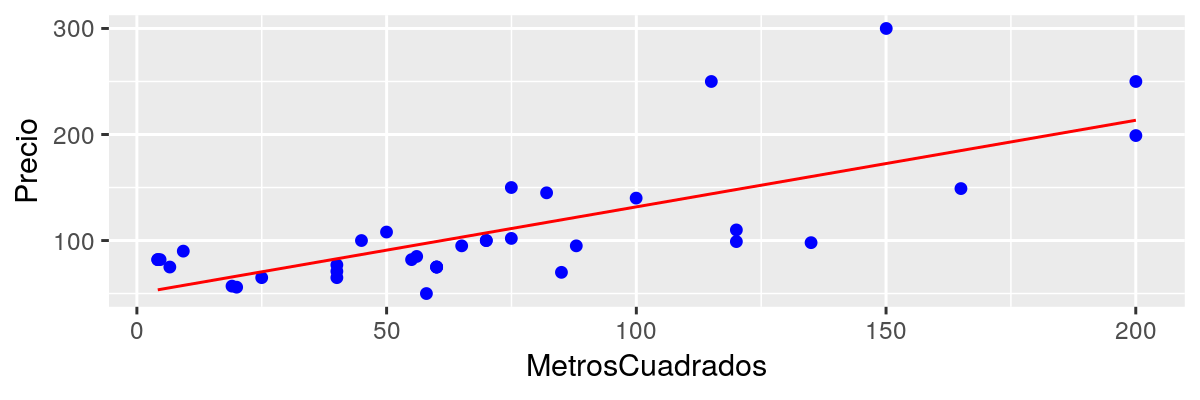

In [47]:
model <- lm(data=barrio_sol, formula = barrio_sol$Precio ~ barrio_sol$MetrosCuadrados)
barrio_sol$LinealModel <- model$coefficients[1] + model$coefficients[2]*barrio_sol$MetrosCuadrados
# Veamoslo en la gráfica
library(ggplot2)
options(repr.plot.height=2,repr.plot.width=6)
g <- ggplot(data=barrio_sol, aes(Precio, MetrosCuadrados))
g <- g + geom_point(color='blue')
g <- g + geom_line(data=barrio_sol, aes(LinealModel), color='red') + coord_flip()
g
# Analizamos la fiabilidad
cnf_int<-confint(model)
cnf_int
mean <- mean(c(cnf_int[[2,2]], cnf_int[[2,1]]))
err <- cnf_int[[2,2]] - mean

paste("Incremento (95% margen de error) =", mean, "+-", err, "€")

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

,2.5 %,97.5 %
(Intercept),14.90364,51.89820
barrio_sol$NumDormitorios,33.49228,50.93168


[1] "Incremento (95% margen de error) = 42.2119815668203 +- 8.71970282848102 €"

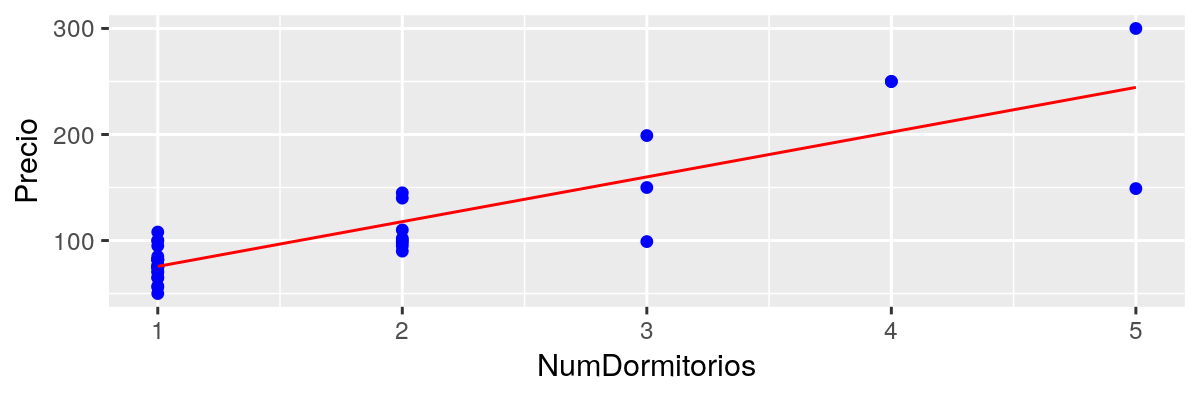

In [48]:
model <- lm(data=barrio_sol, formula = barrio_sol$Precio ~ barrio_sol$NumDormitorios)
barrio_sol$LinealModel <- model$coefficients[1] + model$coefficients[2]*barrio_sol$NumDormitorios
# Veamoslo en la gráfica
library(ggplot2)
options(repr.plot.height=2,repr.plot.width=6)
g <- ggplot(data=barrio_sol, aes(Precio, NumDormitorios))
g <- g + geom_point(color='blue')
g <- g + geom_line(data=barrio_sol, aes(LinealModel), color='red') + coord_flip()
g
# Analizamos la fiabilidad
cnf_int<-confint(model)
cnf_int
mean <- mean(c(cnf_int[[2,2]], cnf_int[[2,1]]))
err <- cnf_int[[2,2]] - mean

paste("Incremento (95% margen de error) =", mean, "+-", err, "€")

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [49]:
numDormitoriosDF <- data.frame(table(factor(barrio_sol$NumDormitorios)))
colnames(numDormitoriosDF) <- c("NumDormitorios", "Freq")
numDormitoriosDF$NumDormitorios <- as.numeric(numDormitoriosDF$NumDormitorios)
numDormitoriosDF

NumDormitorios,Freq
<dbl>,<int>
1,21
2,8
3,3
4,2
5,2


In [50]:
num_apartamentos <- sum(numDormitoriosDF$Freq)
for (i in 1:5) {
    dis_binom <- binom.test(
        numDormitoriosDF[numDormitoriosDF$NumDormitorios == i, "Freq"],
        num_apartamentos,
        conf.level=0.95
    )
    numDormitoriosDF$Probabilidad[numDormitoriosDF$NumDormitorios == i] <- dis_binom$estimate
    numDormitoriosDF$Confianza.Bot[numDormitoriosDF$NumDormitorios == i] <- dis_binom$conf.int[1]
    numDormitoriosDF$Confianza.Top[numDormitoriosDF$NumDormitorios == i] <- dis_binom$conf.int[2]
}
numDormitoriosDF

NumDormitorios,Freq,Probabilidad,Confianza.Bot,Confianza.Top
<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,21,0.58333333,0.407565241,0.7448590
2,8,0.22222222,0.101150530,0.3915176
3,3,0.08333333,0.017526496,0.2246898
4,2,0.05555556,0.006800301,0.1866367
5,2,0.05555556,0.006800301,0.1866367


In [51]:
print(paste("La probabilidad de encontrar un apartamento con 3 habitaciones es", numDormitoriosDF$Probabilidad[numDormitoriosDF$NumDormitorios == 3]))
print(paste("El intervalo de confianza es", 
            numDormitoriosDF$Confianza.Bot[numDormitoriosDF$NumDormitorios == 3],
            numDormitoriosDF$Confianza.Top[numDormitoriosDF$NumDormitorios == 3]))

[1] "La probabilidad de encontrar un apartamento con 3 habitaciones es 0.0833333333333333"
[1] "El intervalo de confianza es 0.0175264959239346 0.224689760556973"


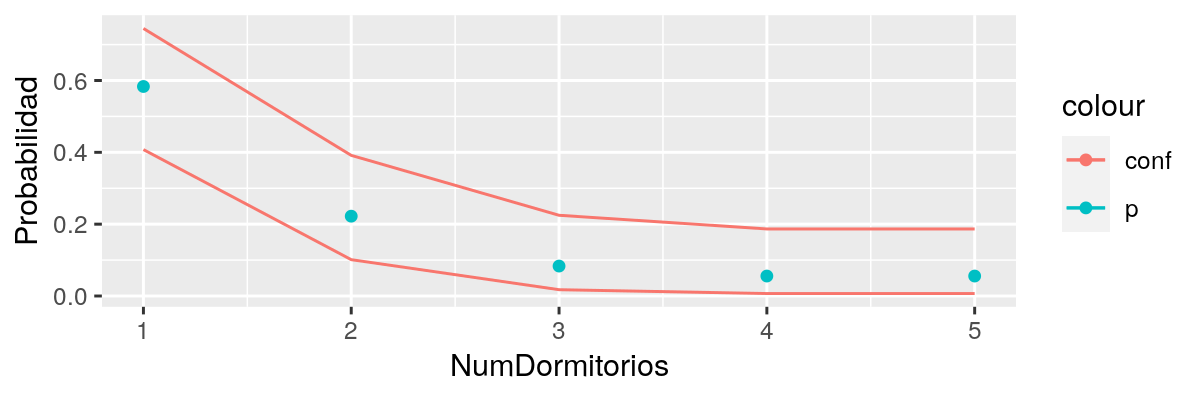

In [52]:
ggplot(data=numDormitoriosDF) +
    geom_point(aes(NumDormitorios, Probabilidad, color='p')) +
    geom_line(aes(NumDormitorios, Confianza.Bot, color='conf')) +
    geom_line(aes(NumDormitorios, Confianza.Top, color='conf'))